# Web Scrapping with NBA Stats

We use the NBA basketball referance site for our web scrapping. We consider the season 2018-2019 as our point of interest. The reason of not choosing the most current season 2019-2020 was that, there was a break due to the COVID-19 outbreak. As a reasult, there was not enough data for our analysis.

<img src="https://wallpaperplay.com/walls/full/4/0/3/91229.jpg"/>

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

### Soup object
First we create the soup object from the link with help of the BeautifulSoup function from the bs4 library.

In [2]:
# NBA season we will be analyzing
html = requests.get('https://www.basketball-reference.com/leagues/NBA_2019_totals.html')
soup = BeautifulSoup(html.content)

### Column headers 
We find all the headers name from the table which we will use as our columns name in the data frame.


In [3]:
# use findALL() to get the column headers
soup.find('tr')
# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.find('tr').findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
print(headers)

['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


### Rows
Get all the rows of our dataframe.

In [4]:
# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [5]:
#now create the dataframe from the headers and rows in the player_stats above
df = pd.DataFrame(player_stats, columns = headers)
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,588,56,157,.357,...,.923,5,43,48,20,17,6,14,53,165
1,Quincy Acy,PF,28,PHO,10,0,123,4,18,.222,...,.700,3,22,25,8,1,4,4,24,17
2,Jaylen Adams,PG,22,ATL,34,1,428,38,110,.345,...,.778,11,49,60,65,14,5,28,45,108
3,Steven Adams,C,25,OKC,80,80,2669,481,809,.595,...,.500,391,369,760,124,117,76,135,204,1108
4,Bam Adebayo,C,21,MIA,82,28,1913,280,486,.576,...,.735,165,432,597,184,71,65,121,203,729


In [6]:
# save the dataset as csv file and read the csv file again
df.to_csv('NBA.csv')
df = pd.read_csv('NBA.csv', encoding = 'utf-8')
# remove the Unnamed colume
df = df.drop(columns=['Unnamed: 0'])
df.shape

(734, 29)

### Descriptions
Describing the columns hearders. Next we dive deep into descriping our columns headers. 

In [7]:
total = soup.find('tr').findAll('th')
des = [total[i]['aria-label'] for i in range(len(total))]
#remove the first row from header description
header_des = des[1:]
#convert the headers and header_des lists into a dictionary
headers_dic = dict(zip(headers, header_des))
#convert the above dictionary into a DataFrame
headers_descriptions = pd.DataFrame.from_dict(headers_dic,orient='index')
headers_descriptions.columns = ["Short Description"]
headers_descriptions

,Short Description
Player,Player
Pos,Position
Age,Player's age on February 1 of the season
Tm,Team
G,Games
GS,Games Started
MP,Minutes Played
FG,Field Goals
FGA,Field Goal Attempts
FG%,Field Goal Percentage


### Team names

In [8]:
html2 = requests.get('https://en.wikipedia.org/wiki/Wikipedia:WikiProject_National_Basketball_Association/National_Basketball_Association_team_abbreviations')
soup2 = BeautifulSoup(html2.content)

In [9]:
# use findALL() to get the column headers
soup2.find('tr')
# use getText()to extract the text we need into a list
headers2 = [b.getText() for b in soup2.find('tr').findAll('b')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
#headers2 = headers2[1:]
print(headers2)

['Abbreviation/Acronym', 'Franchise']


In [10]:
# avoid the first header row
rows2 = soup2.findAll('tr')[1:]
team_stats = [[td.getText() for td in rows2[i].findAll('td')]
            for i in range(len(rows2))]

In [11]:
df_team = pd.DataFrame(team_stats,columns = headers2)
for column in df_team.columns:
    df_team[column] = df_team[column].str.replace('\n','')

In [12]:
df_team.set_index('Abbreviation/Acronym',inplace = True)
df_team

,Franchise
Abbreviation/Acronym,
ATL,Atlanta Hawks
BKN,Brooklyn Nets
BOS,Boston Celtics
CHA,Charlotte Hornets
CHI,Chicago Bulls
CLE,Cleveland Cavaliers
DAL,Dallas Mavericks
DEN,Denver Nuggets
DET,Detroit Pistons


In [13]:
# Cheaking the missing values
df.isnull().sum()

Player    26
Pos       26
Age       26
Tm        26
G         26
GS        26
MP        26
FG        26
FGA       26
FG%       32
3P        26
3PA       26
3P%       73
2P        26
2PA       26
2P%       41
eFG%      32
FT        26
FTA       26
FT%       69
ORB       26
DRB       26
TRB       26
AST       26
STL       26
BLK       26
TOV       26
PF        26
PTS       26
dtype: int64

In [14]:
# Drop the missing values
df.dropna(inplace= True)
df.shape

(629, 29)

## Data exploration

### Age distribution

In [15]:
# Age distribution
df.Age.iplot(kind='hist',color='olive')

### Average age 

In [16]:
# Average age of team players
df_team = df.groupby('Tm')['Age'].agg('mean').sort_values().iplot(kind = 'bar',color = 'lightslategray')

In [17]:
# Average player age of different positions in the whole NBA season 2018-2019
df.groupby('Pos')['Age'].agg('mean').sort_values().iplot(kind = 'bar',color = 'indigo')

### Teams' performance comparison

In [18]:
df_NY_knicks = df[df['Tm'] =='NYK'] 
df_Toronto_Raptors = df[df['Tm'] == 'TOR']


df_avg_NY_knicks = df_NY_knicks[['FG%','3P%','2P%','eFG%','FT%']].mean()
df_avg_Tor = df_Toronto_Raptors[['FG%','3P%','2P%','eFG%','FT%']].mean()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
  r = df_avg_Tor,
  theta=['Field Goals Percentage','3-Points Goal Percentage','2-Points Goal Percentage', 'Effective Field Goal Percentage',
           'Free Throw Percentage'],
  fill='toself',
  name = 'Toronto Raptors'
))

fig.add_trace(go.Scatterpolar(
  r = df_avg_NY_knicks,
  theta=['Field Goals Percentage','3-Points Goal Percentage','2-Points Goal Percentage', 'Effective Field Goal Percentage',
           'Free Throw Percentage'],
  fill='toself',
  name = 'NY Knicks'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True,
title = 'NY Knicks VS Toronto Raptors:Attacking'
)

fig.show()
#NY Knicks VS Toronto Raptors: Attacking radar plots

In [19]:
def normalize(val):
    return (val-val.min())/((val.max()-val.min()))

df_avg_NY_knicks_def = df_NY_knicks[['DRB','STL','BLK','TOV']].apply(normalize).mean()
df_avg_Tor_def = df_Toronto_Raptors[['DRB','STL','BLK','TOV']].apply(normalize).mean()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
  r = df_avg_NY_knicks_def,
  theta=['Deffensive Rebounds','Steals','Blocks', 'Turnover'],
  fill='toself',
  name = 'NY Knicks'
))
fig.add_trace(go.Scatterpolar(
  r = df_avg_Tor_def,
  theta=['Deffensive Rebounds','Steals','Blocks', 'Turnover'],
  fill='toself',
  name = 'Toronto Raptors'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True,
title = 'NY Knicks VS Toronto Raptors::Defence '
)

fig.show()
# NY Knicks VS Toronto Raptors:Defence radar plots

### Find the top and least scorers

In [20]:
# Top scorers
top_scorers= df.sort_values(by = 'PTS',ascending=False).head(5)
top_scorers

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
277,James Harden,PG,29.0,HOU,78.0,78.0,2867.0,843.0,1909.0,0.442,...,0.879,66.0,452.0,518.0,586.0,158.0,58.0,387.0,244.0,2818.0
249,Paul George,SF,28.0,OKC,77.0,77.0,2841.0,707.0,1614.0,0.438,...,0.839,105.0,523.0,628.0,318.0,170.0,34.0,205.0,214.0,2159.0
689,Kemba Walker,PG,28.0,CHO,82.0,82.0,2863.0,731.0,1684.0,0.434,...,0.844,52.0,309.0,361.0,484.0,102.0,34.0,211.0,131.0,2102.0
48,Bradley Beal,SG,25.0,WAS,82.0,82.0,3028.0,764.0,1609.0,0.475,...,0.808,89.0,322.0,411.0,448.0,121.0,58.0,224.0,226.0,2099.0
416,Damian Lillard,PG,28.0,POR,80.0,80.0,2838.0,681.0,1533.0,0.444,...,0.912,68.0,303.0,371.0,551.0,88.0,34.0,212.0,148.0,2067.0


In [21]:
# Least scorers
least_scorers= df.sort_values(by = 'PTS',ascending=False).tail(5)
least_scorers

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6,DeVaughn Akoon-Purcell,SG,25.0,DEN,7.0,0.0,22.0,3.0,10.0,0.300,...,0.5,1.0,3.0,4.0,6.0,2.0,0.0,2.0,4.0,7.0
549,Justin Patton,C,21.0,PHI,3.0,0.0,21.0,2.0,7.0,0.286,...,0.5,2.0,4.0,6.0,3.0,2.0,0.0,0.0,5.0,5.0
457,Tahjere McCall,SG,24.0,BRK,1.0,0.0,8.0,2.0,3.0,0.667,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0
247,Pau Gasol,C,38.0,MIL,3.0,0.0,30.0,1.0,6.0,0.167,...,0.5,0.0,10.0,10.0,2.0,0.0,1.0,2.0,1.0,4.0
371,Terrence Jones,PF,27.0,HOU,2.0,0.0,5.0,1.0,4.0,0.250,...,0.0,0.0,4.0,4.0,0.0,0.0,0.0,1.0,1.0,2.0


### Comparison of players' performance

In [22]:
vince = df[df['Age'] == 42]
giannis = df[df['Player'] == 'Giannis Antetokounmpo']
df_avg_giannis = giannis[['FG%','3P%','2P%','eFG%','FT%']]
df_avg_vince = vince[['FG%','3P%','2P%','eFG%','FT%']]
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
  r = df_avg_giannis.iloc[0,:],
  theta=['Field Goals Percentage','3-Points Goal Percentage','2-Points Goal Percentage', 'Effective Field Goal Percentage',
           'Free Throw Percentage'],
  fill='toself',
  name = 'Giannis'
))
fig.add_trace(go.Scatterpolar(
  r = df_avg_vince.iloc[0,:],
  theta=['Field Goals Percentage','3-Points Goal Percentage','2-Points Goal Percentage', 'Effective Field Goal Percentage',
           'Free Throw Percentage'],
  fill='toself',
  name = 'Vince'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True,
title = 'MVP VS MOP'
)
fig.show()
# Giannis Antetokounmpo VS Vince Carter

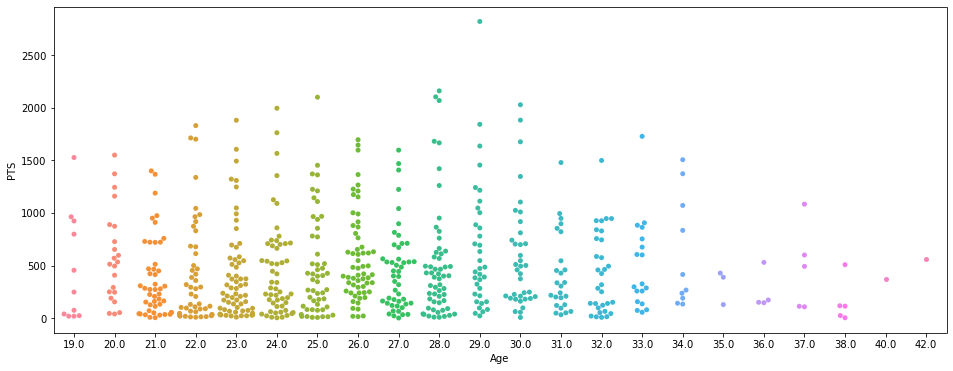

In [23]:
#swarmplot for points earned across ages in a season
plt.figure(figsize=(16, 6))
ax = sns.swarmplot(x="Age", y="PTS", data=df)

### Analysis the performance with age using certain stats

In [24]:
df_avg_age=df.groupby(by='Age')[['TOV','PTS','3P']].mean()
df_avg_age.iplot(kind='line',secondary_y='PTS')
# fig = px.scatter(x=df.Age, y=df.TOV)
# fig.show()

### Analysis the performance with the Age and Position
We check if the players become less offensive or defensive as they grow old. 

In [25]:
# Taking only those players whose positon was fixed. 
df_drop_multipos=df[df['Pos'].isin(['SG','PF','PG','C','SF'])]
# scatter ploting for the remaining data
fig = px.scatter(df_drop_multipos, x="Age", y="ORB", color="Pos", size='FG',hover_data=['DRB'])
fig.show()

In [26]:
#Considering personal foul of players according to the age 
fig = px.scatter(df_drop_multipos, x="Age", y="PF", color="Pos", size='STL',hover_data=['BLK','AST'])
fig.show()

### Calculate the player efficiency rating (PER)
Player Efficiency Rating (available since the 1951-52 season): PER is a rating developed by ESPN.com columnist John Hollinger. In John's words, "The PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance." 

In [27]:
# Create the function to calculate the PER
def per(data):
    return (data['PTS']+data['TRB']+data['AST']+data['STL']+data['BLK']-data['FGA']+data['FG']\
           -data['FTA']+data['FT']-data['TOV'])/data['G']
# Apply the PER for the whole dataframe
df['PER']=df.apply(per,axis=1)


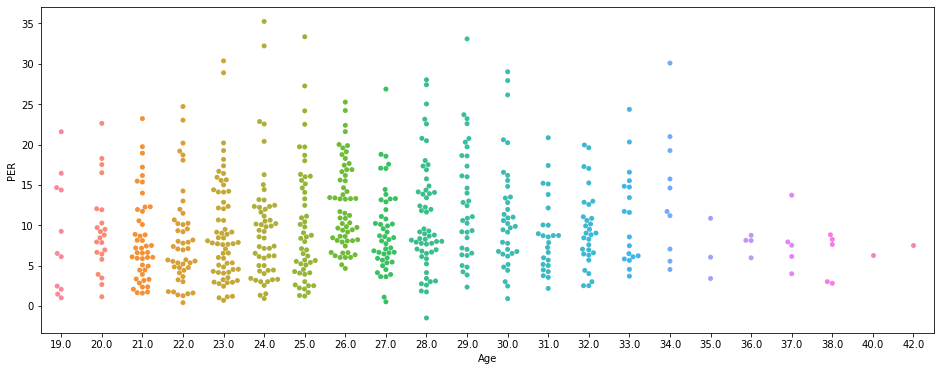

In [28]:
# Swarmplot to show the PER changes with the age
plt.figure(figsize=(16, 6))
ax = sns.swarmplot(x="Age", y="PER", data=df)

### Top players of season 2018-2019

In [29]:
# sorting the players according to PER and select the top 10 among them
top_ten_players = df.sort_values(by='PER',ascending=False).head(10)
top_ten_players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
19,Giannis Antetokounmpo,PF,24.0,MIL,72.0,72.0,2358.0,721.0,1247.0,0.578,...,159.0,739.0,898.0,424.0,92.0,110.0,268.0,232.0,1994.0,35.250000
167,Anthony Davis,C,25.0,NOP,56.0,56.0,1850.0,530.0,1026.0,0.517,...,174.0,498.0,672.0,218.0,88.0,135.0,112.0,132.0,1452.0,33.357143
277,James Harden,PG,29.0,HOU,78.0,78.0,2867.0,843.0,1909.0,0.442,...,66.0,452.0,518.0,586.0,158.0,58.0,387.0,244.0,2818.0,33.089744
207,Joel Embiid,C,24.0,PHI,64.0,64.0,2154.0,580.0,1199.0,0.484,...,160.0,711.0,871.0,234.0,46.0,122.0,226.0,211.0,1761.0,32.218750
670,Karl-Anthony Towns,C,23.0,MIN,77.0,77.0,2545.0,681.0,1314.0,0.518,...,263.0,691.0,954.0,259.0,67.0,125.0,240.0,292.0,1880.0,30.363636


In [30]:
# visualize the top players 
fig = px.scatter(top_ten_players, x="PTS", y="PER", text="Player", size='Age')

fig.update_traces(textposition='top center')

fig.update_layout(
    height=550,
    title_text='Top ten players according to PER compared'
)

fig.show()

### Ranking teams according to the PER

In [31]:
# Average PER of each team
df.groupby('Tm').PER.mean().sort_values().iplot(kind='bar')

In [32]:
# Teams with the top players
fig = px.scatter(top_ten_players, x="Age", y="PER", color="Tm", size='PTS',text = 'Player',\
                 hover_data=['Player','3P','2P','AST','Pos'])
fig.show()

### PER Distribution

In [33]:
df[['PER']].iplot(kind='hist',histnorm='percent')

### Analysis of 3 points 

In [34]:
fig = px.scatter(df, x="Age", y="3P", color="Pos",size='G',\
                 hover_data=['Player','3P','2P','AST','Pos'])
fig.show()

### Comparing distribution of 2 and 3 points 

In [35]:
df[['2P%','3P%']].iplot(kind='hist',histnorm='percent')

In [36]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER'],
      dtype='object')

### Cross correlations

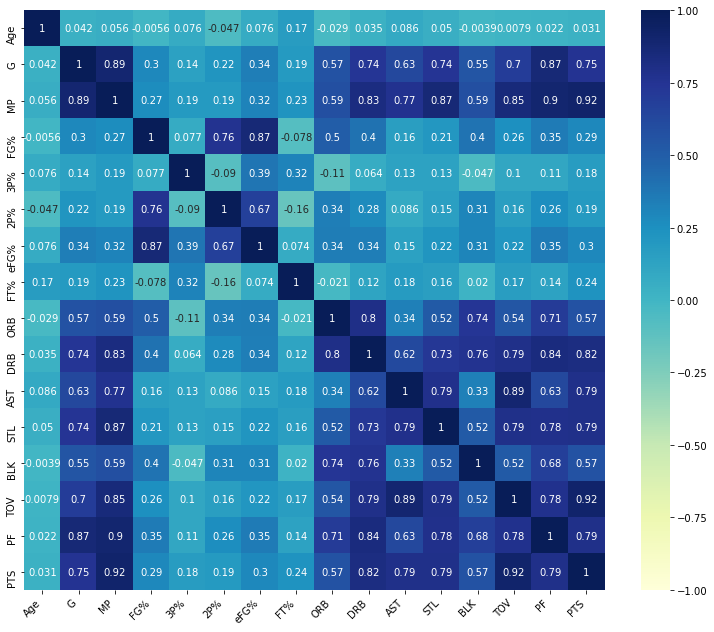

In [37]:
# df_corr = df.iloc[:,4:]
plt.figure(figsize=(13, 13))
corr = df[[ 'Age','G','MP','FG%','3P%','2P%','eFG%','FT%', 'ORB','DRB',\
           'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].corr()

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(60, 160, n=200),
    square=True,annot=True,cmap="YlGnBu",cbar_kws={"shrink": .82}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Visualizing the correlations

In [38]:
fig = px.scatter_matrix(df,
    dimensions=["TOV", "AST", "PF", "ORB","DRB"],
    color="Pos")
fig.show()

<style>
td {
  font-size: 400px
}
</style>
Thank You             |  For Listening
:-------------------------:|:-------------------------:
<img src="https://media.giphy.com/media/JQvUME2YOpTgqCKhDb/giphy.gif"/>   |  <img src="https://media.giphy.com/media/TUbFmLt6xGhZS/giphy.gif"/> 